# Requirements
1. rdkit (pip install rdkit-pypi)
2. dgl (pip install dgl)
3. dgllife (pip install dgllife)

## 1. RDKit: SMILES To Mol

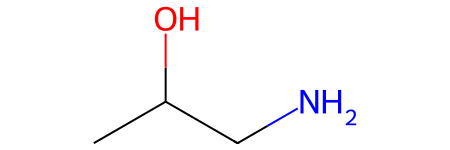

In [2]:
import rdkit
from rdkit import Chem

smi = 'CC(O)CN'
mol = Chem.MolFromSmiles(smi)
mol

0 C
1 C
2 O
3 C
4 N


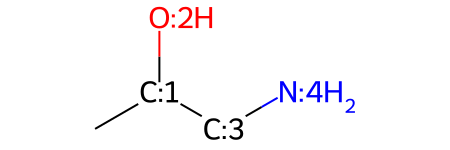

In [18]:
for atom in mol.GetAtoms():
    atom_idx = atom.GetIdx()
    print (atom_idx, atom.GetSymbol())
    atom.SetAtomMapNum(atom_idx)
mol

## 2. Deep Graph Library (DGL): Mol to Graph

In [15]:
from dgllife.utils import mol_to_bigraph, CanonicalAtomFeaturizer, CanonicalBondFeaturizer

node_featurizer = CanonicalAtomFeaturizer() 
edge_featurizer = CanonicalBondFeaturizer()
graph = mol_to_bigraph(mol, node_featurizer = node_featurizer, edge_featurizer = edge_featurizer)
graph

Graph(num_nodes=5, num_edges=8,
      ndata_schemes={'h': Scheme(shape=(74,), dtype=torch.float32)}
      edata_schemes={'e': Scheme(shape=(12,), dtype=torch.float32)})

In [16]:
nodes = graph.nodes()
src, dst = graph.edges()
print ('Nodes:')
print (nodes)
print ('Source:')
print (src)
print ('Destination')
print (dst)

Nodes:
tensor([0, 1, 2, 3, 4], dtype=torch.int32)
Source:
tensor([0, 4, 4, 2, 4, 3, 3, 1], dtype=torch.int32)
Destination
tensor([4, 0, 2, 4, 3, 4, 1, 3], dtype=torch.int32)


In [21]:
node_feats = graph.ndata['h']
edge_feats = graph.edata['e']

In [24]:
node_feats[0]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0.])

# Tasks
### 1. Make dgl graphs for three molecules from the odor dataset and check their node and edges
### 2. Make a function called make_graph() to input a SMILES and output Graph